<a href="https://colab.research.google.com/github/VALQUIRIAFABRO/Estudo-pyspark/blob/master/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import pandas as pd
import numpy as np
import random as round

#visualizacao
import seaborn as sns
#import matplotlib as plt
import matplotlib.pyplot as plt

%matplotlib inline



In [18]:
train = pd.read_csv('train.csv', sep=",")
test = pd.read_csv('test.csv', sep=",")




In [19]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [20]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [46]:
all_data = [train,test]

In [47]:
#Preenchendo valores nulos da coluna Age
train['Age'].fillna(train['Age'].mean(),inplace = True)
test['Age'].fillna(train['Age'].mean(),inplace = True)

In [48]:
train.isnull().sum().sort_values(ascending = False).head(10)

Cabin       687
Embarked      2
Fare          0
Ticket        0
Parch         0
SibSp         0
Age           0
Sex           0
Name          0
Pclass        0
dtype: int64

In [49]:
test.isnull().sum().sort_values(ascending = False).head(10)

Cabin       327
Fare          1
Embarked      0
Ticket        0
Parch         0
SibSp         0
Age           0
Sex           0
Name          0
Pclass        0
dtype: int64

In [50]:
train[['Pclass','Survived']].groupby(['Pclass'], as_index = False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [51]:
train[['Sex','Survived']].groupby(['Sex'], as_index = False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [ ]:
g = sns.FacetGrid(train, col='Survived')
g.map(plt.hist, 'Age', bins = 20)


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


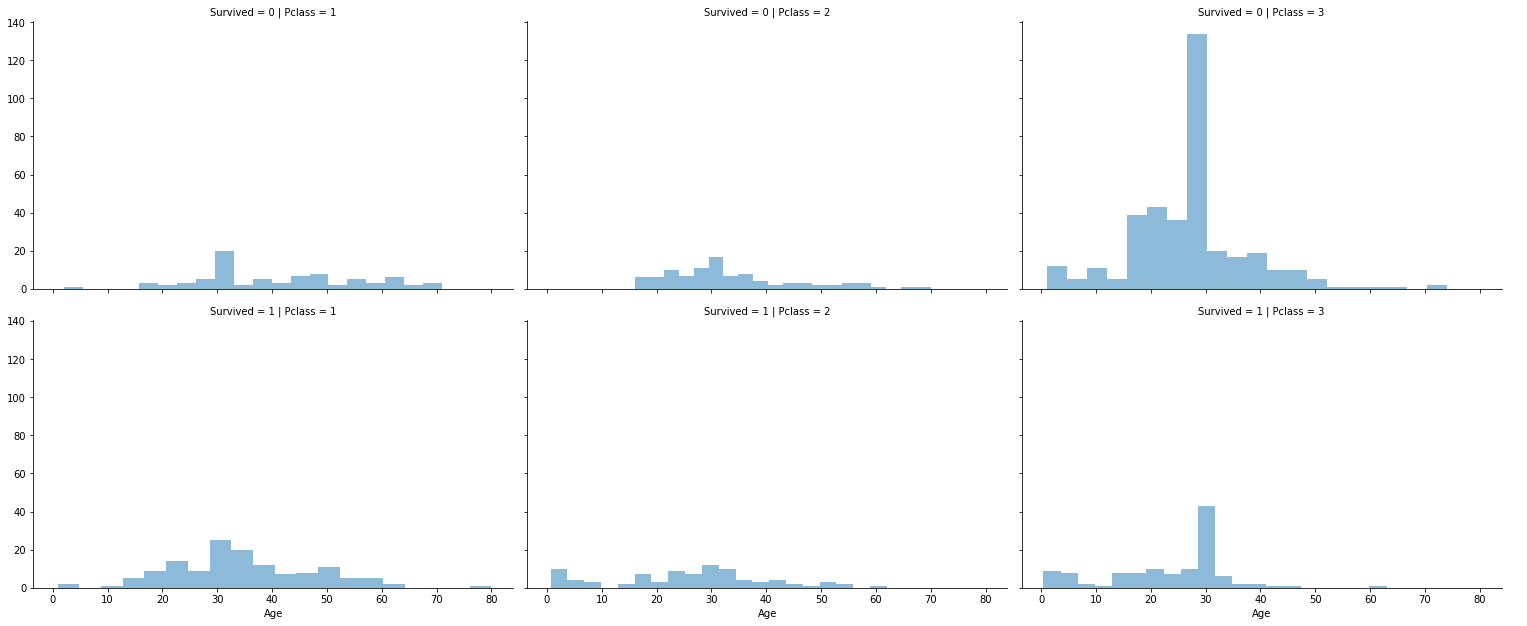

In [38]:
grid = sns.FacetGrid(train,col='Pclass',row='Survived',size=4.4,aspect=1.6)
grid.map(plt.hist,'Age', alpha=.5,bins = 20)
grid.add_legend();

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:723: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:728: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


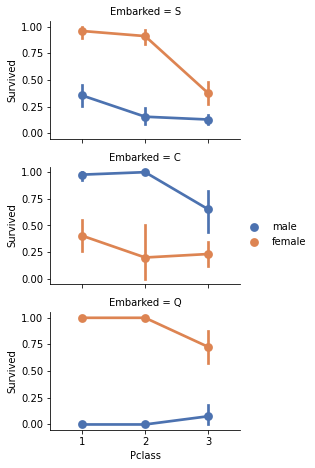

In [52]:
grid = sns.FacetGrid(train,row='Embarked',size=2.2,aspect=1.6)
grid.map(sns.pointplot,'Pclass', 'Survived','Sex',palette='deep')
grid.add_legend();

In [53]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [56]:
print("Antes", train.shape, test.shape, all_data[0].shape,all_data[1].shape)
train = train.drop(["Ticket", 'Cabin'], axis = 1)
test = test.drop(["Ticket", 'Cabin'], axis = 1)
all_data = [train, test]



Antes (891, 12) (418, 11) (891, 12) (418, 11)


In [57]:
print("Após", train.shape, test.shape, all_data[0].shape,all_data[1].shape)


Após (891, 10) (418, 9) (891, 10) (418, 9)


In [59]:
for dataset in all_data:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
pd.crosstab(train['Title'], train['Sex'])


Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [64]:
for dataset in all_data:
    dataset['Title'] = dataset['Title'].replace(['Capt', 'Countess', 'Lady', 'Col', 'Jonkheer', 'Sir', 'Don', 'Dr', 'Dr', 'Mme', 'Mlle', 'Rev'], 'Baixa Frequência')
    #dataset['Title'] = dataset['Title'].replace(['Ms', 'Miss'], 'Ms and Miss')
    dataset['Title'] = dataset['Title'].replace(['Ms'], 'Miss')
train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()


,Title,Survived
0,Baixa Frequência,0.416667
1,Major,0.500000
2,Master,0.575000
3,Mr,0.156673
4,Mrs,0.792000
5,Ms and Miss,0.699454


In [65]:
title_mapping = {"Mr":1,"Miss":2,"Mrs":3, "Master":4,"BaixaFrequencia":5}
for dataset in all_data:
    dataset['Title']=dataset['Title'].map(title_mapping)
    dataset['Title']=dataset['Title'].fillna(0)
train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1.0


In [69]:
train = train.drop(['Name','PassengerId'], axis = 1)
test = test.drop(['Name','PassengerId'], axis = 1)
all_data = [train,teste]

KeyError: ignored

In [ ]:
train.describe(include=['0'])